# Semantic Spaces

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import numpy.linalg as la
import matplotlib.pyplot as plt

{'text9': 11, 'txt': 12, 'text8': 10, 'text6': 8, 'text7': 9, 'text5': 7, 'text4': 6, 'text12': 3, 'text1': 0, 'text11': 2, 'text3': 5, 'text2': 4, 'text10': 1}
['text1', 'text10', 'text11', 'text12', 'text2', 'text3', 'text4', 'text5', 'text6', 'text7', 'text8', 'text9', 'txt']


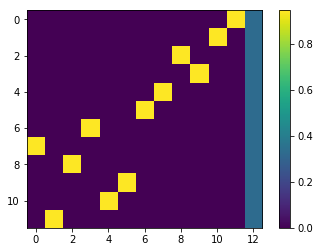

In [4]:
t_v2 = TfidfVectorizer( max_features=n_features,
                                   stop_words='english', sublinear_tf=True)
import os
directory = './docs/'
flist = [fname for fname in os.listdir(directory)]
books = t_v2.fit_transform(flist)
books.shape
books_d=books.todense()
plt.imshow(books_d)
plt.colorbar(); plt.savefig("./images/books_matrix.png");
print(t_v2.vocabulary_)
print(t_v2.get_feature_names())

In [5]:
print(books_d.round(2))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.   0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.94 0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.33]
 [0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33]
 [0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.33]
 [0.   0.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33]]


In [6]:
U, sig, V = la.svd(books_d)
print(sig)

[1.47971049 0.94438325 0.94438325 0.94438325 0.94438325 0.94438325
 0.94438325 0.94438325 0.94438325 0.94438325 0.94438325 0.94438325]


In [7]:
strings = ["Human machine interface for ABC computer applications",
"A survey of user opinion of computer system response time",
"The EPS user interface management system",
"System and human system engineering testing of EPS",
"Relation of user perceived response time to error measurement",
"The generation of random, binary, ordered trees",
"The intersection graph of paths in trees",
"Graph minors IV: Widths of trees and well-quasi-ordering",
"Graph minors: A survey"]
string_short = ["m1","m2", "m3", "m4", "m5", "g1", "g2", 'g3', "g4"]

{'human': 3, 'interface': 4, 'computer': 0, 'survey': 8, 'user': 11, 'response': 7, 'time': 9, 'eps': 1, 'perceived': 6, 'trees': 10, 'graph': 2, 'minors': 5}
['computer', 'eps', 'graph', 'human', 'interface', 'minors', 'perceived', 'response', 'survey', 'time', 'trees', 'user']


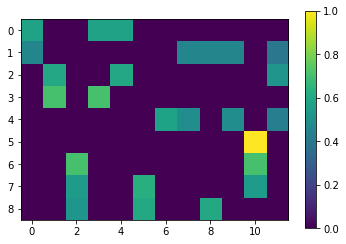

In [8]:
t_v3 = TfidfVectorizer( max_features=12,
                                   stop_words='english', sublinear_tf=True)

titles = t_v3.fit_transform(strings)
titles_d=titles.todense()
plt.imshow(titles_d)
plt.colorbar(); plt.savefig("./images/books_matrix.png");
print(t_v3.vocabulary_)
print(t_v3.get_feature_names())

In [9]:
print(titles_d.round(2))

[[0.58 0.   0.   0.58 0.58 0.   0.   0.   0.   0.   0.   0.  ]
 [0.46 0.   0.   0.   0.   0.   0.   0.46 0.46 0.46 0.   0.4 ]
 [0.   0.6  0.   0.   0.6  0.   0.   0.   0.   0.   0.   0.52]
 [0.   0.71 0.   0.71 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.58 0.49 0.   0.49 0.   0.43]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.71 0.   0.   0.   0.   0.   0.   0.   0.71 0.  ]
 [0.   0.   0.55 0.   0.   0.63 0.   0.   0.   0.   0.55 0.  ]
 [0.   0.   0.52 0.   0.   0.6  0.   0.   0.6  0.   0.   0.  ]]


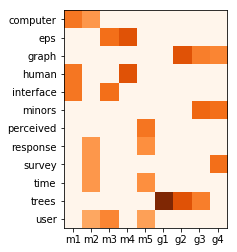

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(titles_d.T, cmap=plt.cm.Oranges)

# We want to show all ticks...
ax.set_yticks(np.arange(len(t_v3.get_feature_names())))
ax.set_xticks(np.arange(len(strings)))
# ... and label them with the respective list entries
ax.set_yticklabels(t_v3.get_feature_names());
ax.set_xticklabels(string_short); plt.savefig("./images/titles_matrix.png", bbox_inches='tight');

In [11]:
def bmatrix(a):
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

print(bmatrix(titles_d.round(2).T))

\begin{bmatrix}
  0.58 & 0.46 & 0. & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0.6 & 0.71 & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0.71 & 0.55 & 0.52\\
  0.58 & 0. & 0. & 0.71 & 0. & 0. & 0. & 0. & 0.\\
  0.58 & 0. & 0.6 & 0. & 0. & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 0. & 0. & 0.63 & 0.6\\
  0. & 0. & 0. & 0. & 0.58 & 0. & 0. & 0. & 0.\\
  0. & 0.46 & 0. & 0. & 0.49 & 0. & 0. & 0. & 0.\\
  0. & 0.46 & 0. & 0. & 0. & 0. & 0. & 0. & 0.6\\
  0. & 0.46 & 0. & 0. & 0.49 & 0. & 0. & 0. & 0.\\
  0. & 0. & 0. & 0. & 0. & 1. & 0.71 & 0.55 & 0.\\
  0. & 0.4 & 0.52 & 0. & 0.43 & 0. & 0. & 0. & 0.\\
\end{bmatrix}


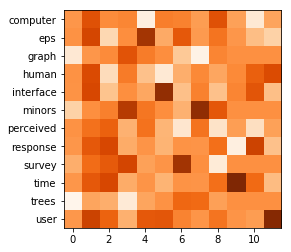

In [12]:
U, sig, V = la.svd(titles_d.T)
fig, ax = plt.subplots()
im = ax.imshow(U, cmap=plt.cm.Oranges)
ax.set_yticks(np.arange(len(t_v3.get_feature_names())))
ax.set_yticklabels(t_v3.get_feature_names());
plt.savefig("./images/U_matrix.png", bbox_inches='tight');

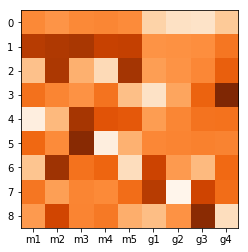

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(V, cmap=plt.cm.Oranges)
ax.set_xticks(np.arange(len(strings)))
ax.set_xticklabels(string_short);
plt.savefig("./images/V_matrix.png", bbox_inches='tight');

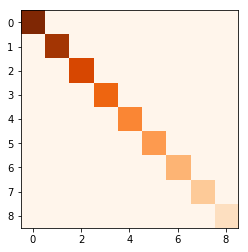

In [14]:
rank = len(strings)
sigma = np.zeros((rank, rank))
for i in range(rank):
    sigma[i][i] = sig[i]
fig, ax = plt.subplots()
im = ax.imshow(sigma, cmap=plt.cm.Oranges)

plt.savefig("./images/sigma_matrix.png", bbox_inches='tight');

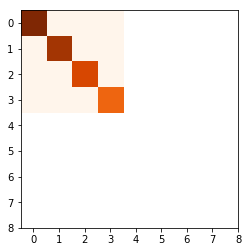

In [15]:
r = 4
sigma_r = np.zeros((r, r))
for i in range(r):
    sigma_r[i][i] = sig[i]
fig, ax = plt.subplots()
im = ax.imshow(sigma_r, cmap=plt.cm.Oranges)
# We want to show all ticks...
ax.set_yticks(np.arange(len(strings)))
ax.set_xticks(np.arange(len(strings)))
plt.savefig("./images/sigma_r_matrix.png", bbox_inches='tight');

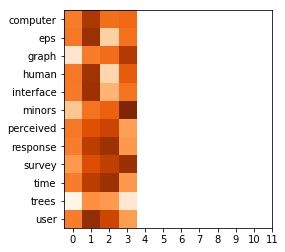

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(U[:,:r], cmap=plt.cm.Oranges)
U_r = U[:,:r]
ax.set_yticks(np.arange(len(t_v3.get_feature_names())))
ax.set_xticks(np.arange(len(t_v3.get_feature_names())))
ax.set_yticklabels(t_v3.get_feature_names());
plt.savefig("./images/U_r_matrix.png", bbox_inches='tight');

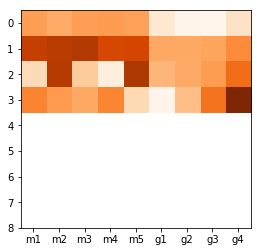

In [17]:
V_r = V[:r,:]
fig, ax = plt.subplots()
im = ax.imshow(V[:4,:], cmap=plt.cm.Oranges)
ax.set_xticks(np.arange(len(strings)))
ax.set_yticks(np.arange(len(strings)))
ax.set_xticklabels(string_short);
plt.savefig("./images/V_r_matrix.png", bbox_inches='tight');

In [18]:
def cos_sim(x,y):
    xf = np.ravel(x)
    yf = np.ravel(y)
    sim = np.dot(xf,yf)/(np.sqrt(sum(xf**2))*np.sqrt(sum(yf**2)))
    return sim

#['computer', 'eps', 'graph', 'human', 'interface', 'minors', 'perceived', 'response', 'survey', 'time', 'trees', 'user']
print("graph vs tree", cos_sim(U_r[2,:], U_r[10,:]))
print("human vs user", cos_sim(U_r[3,:], U_r[11,:]))
print("graph vs minor", cos_sim(U_r[2,:], U_r[5,:]))
print("human vs interface", cos_sim(U_r[3,:], U_r[4,:]))

graph vs tree 0.3504019113046441
human vs user 0.11452249197177976
graph vs minor 0.9028829871966637
human vs interface 0.9521816798157577


In [19]:
print("m1 vs m3", cos_sim(V_r[:,0], V_r[:,2]))
print("g1 vs g2", cos_sim(V_r[:,5], V_r[:,6]))
print("m4 vs g1", cos_sim(V_r[:,4], V_r[:,5]))

m1 vs m3 0.9352702052865914
g1 vs g2 0.8344678296253983
m4 vs g1 0.18185647706860067


# For visualisation use 2d vectors

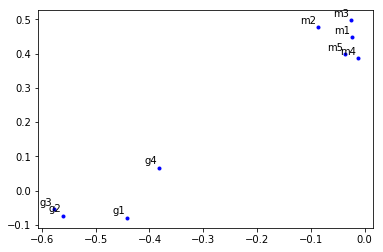

In [20]:
r = 2
V_r = V[:r,:]
U_r = U[:,:r]

#in document space
plt.plot(V_r[0, :], V_r[1, :], 'b.')
for i in range(9):
    label = string_short[i]
    x = V_r[0, i]
    y = V_r[1, i]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/doc_space.eps", bbox_inches='tight');

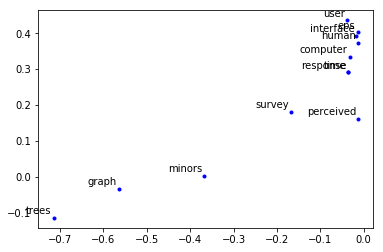

In [21]:
#in term space
plt.plot(U_r[:, 0], U_r[:, 1], 'b.')
for i in range(len(t_v3.get_feature_names())):
    label = t_v3.get_feature_names()[i]
    x = U_r[i, 0]
    y = U_r[i, 1]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/term_space.eps", bbox_inches='tight');

In [49]:
command = ["What is the time",
         "What is the day",
         "What time is the meeting",
         "Cancel the meeting"]
command_names = ["s1","s2", "s3", "s4"]

{'what': 6, 'is': 2, 'the': 4, 'time': 5, 'day': 1, 'meeting': 3, 'cancel': 0}
['cancel', 'day', 'is', 'meeting', 'the', 'time', 'what']


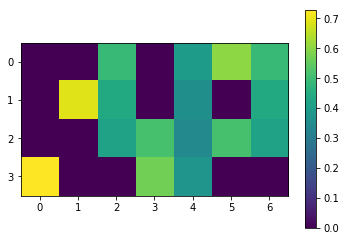

In [55]:
vocab_size = 7
t_v4 = TfidfVectorizer(max_features=vocab_size)

coms = t_v4.fit_transform(command)
coms_d=coms.todense()
plt.imshow(coms_d)
plt.colorbar(); plt.savefig("./images/coms_matrix.png");
print(t_v4.vocabulary_)
print(t_v4.get_feature_names())

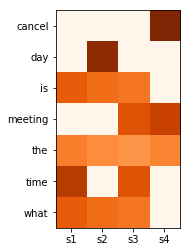

In [58]:
fig, ax = plt.subplots()
im = ax.imshow(coms_d.T, cmap=plt.cm.Oranges)
ax.set_yticks(np.arange(len(t_v4.get_feature_names())))
ax.set_xticks(np.arange(len(command)))
ax.set_yticklabels(t_v4.get_feature_names());
ax.set_xticklabels(command_names); plt.savefig("./images/coms_matrix.png", bbox_inches='tight');

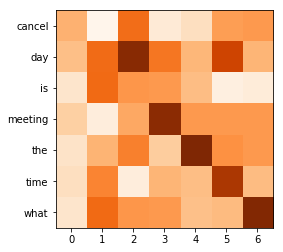

In [60]:
Uc, sigc, Vc = la.svd(coms_d.T)
fig, ax = plt.subplots()
im = ax.imshow(Uc, cmap=plt.cm.Oranges)

ax.set_yticks(np.arange(len(t_v4.get_feature_names())))
ax.set_yticklabels(t_v4.get_feature_names());
plt.savefig("./images/Uc_matrix.png", bbox_inches='tight');

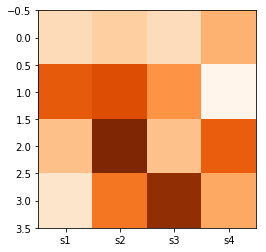

In [61]:
fig, ax = plt.subplots()
im = ax.imshow(Vc, cmap=plt.cm.Oranges)
ax.set_xticks(np.arange(len(command_names)))
ax.set_xticklabels(command_names);
plt.savefig("./images/Vn_matrix.png", bbox_inches='tight');

[1.55635388 0.97256873 0.73391973 0.30534324]


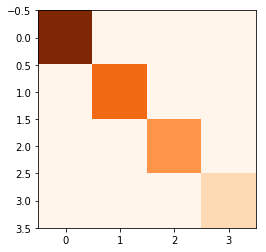

In [63]:
rank = 4
sigmac = np.zeros((rank, rank))
for i in range(rank):
    sigmac[i][i] = sigc[i]
fig, ax = plt.subplots()
im = ax.imshow(sigmac, cmap=plt.cm.Oranges)
plt.savefig("./images/sigmac_matrix.png", bbox_inches='tight');

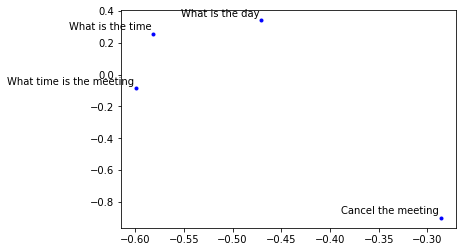

In [66]:
r = 2
V_r = Vc[:r,:]
U_r = Uc[:,:r]

#in document space
plt.plot(V_r[0, :], V_r[1, :], 'b.')
for i in range(4):
    label = command[i]
    x = V_r[0, i]
    y = V_r[1, i]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/doc_c_space.eps", bbox_inches='tight');

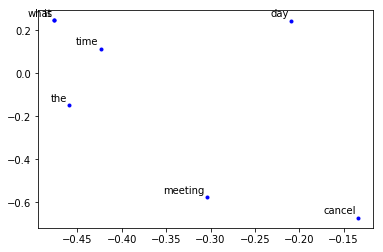

In [70]:
#in term space
plt.plot(U_r[:, 0], U_r[:, 1], 'b.')
for i in range(len(t_v4.get_feature_names())):
    label = t_v4.get_feature_names()[i]
    x = U_r[i, 0]
    y = U_r[i, 1]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/term_c_space.eps", bbox_inches='tight');

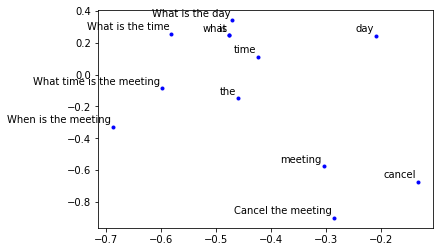

In [93]:
V_r = Vc[:r,:]
U_r = Uc[:,:r]
c_new = ["When is the meeting"]
c_pn = t_v4.transform(c_new).todense()
V_new = np.dot(c_pn, Uc)[:,:r] #project new data in to semantic space
C = np.concatenate([V_r, U_r.T, V_new.T], axis=1)
plt.plot(C[0, :], C[1, :], 'b.')
labs = command+t_v4.get_feature_names()+["When is the meeting"]
for i in range(len(labs)):
    label = labs[i]
    x =C[0, i]
    y =C[1, i]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/both_c_space.eps", bbox_inches='tight');

In [33]:
n_samples = 1000
n_features = 1000
n_components = 10
n_top_words = 20
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]

{'sure': 879, 'story': 865, 'did': 272, 'statement': 859, 'media': 569, 'pro': 708, 'israeli': 472, 'world': 986, 'having': 414, 'described': 264, 'letter': 512, 'try': 921, 'think': 903, 'reason': 742, 'report': 759, 'clearly': 188, 'soldiers': 835, 'received': 745, 'government': 395, 'makes': 551, 'away': 111, 'look': 533, 'jews': 478, 'got': 393, 'power': 697, 'expect': 337, 'people': 667, 'read': 737, 'faq': 347, 'actually': 55, 'accept': 48, 'hard': 411, 'need': 610, 'little': 526, 'faith': 343, 'runs': 777, 'sorry': 840, 'oh': 632, 'just': 482, 'end': 318, 'maybe': 564, 'start': 855, 'new': 615, 'newsgroup': 617, 'won': 978, 'big': 123, 'don': 294, 'forget': 370, 'points': 686, 'like': 518, 'know': 493, 'ask': 97, 'question': 728, 'sort': 841, 'arab': 85, 'want': 956, 'continue': 219, 'israel': 471, 'stop': 864, 'questions': 729, 'work': 982, 'bad': 112, 'begin': 117, 'attack': 101, 'group': 400, 'stupid': 870, 'center': 167, 'policy': 688, 'research': 763, 'change': 172, 'area':

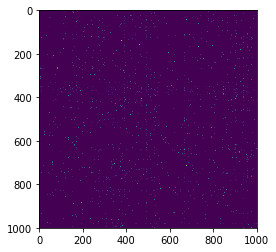

In [34]:
# Use tf-idf features
t_v1 = TfidfVectorizer(max_features=n_features,
                                   stop_words='english')
news = t_v1.fit_transform(data_samples)
news_d=news.todense()
plt.imshow(news_d); plt.savefig("./images/news_matrix.png");
print(t_v1.vocabulary_)
print(t_v1.get_feature_names())

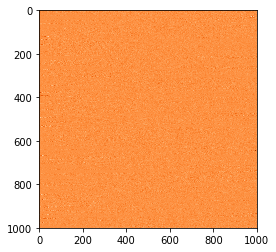

In [94]:
Un, sign, Vn = la.svd(news_d.T)
fig, ax = plt.subplots()
im = ax.imshow(Un, cmap=plt.cm.Oranges)

plt.savefig("./images/Un_matrix.png", bbox_inches='tight');

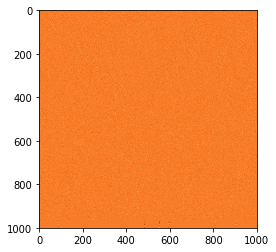

In [36]:
fig, ax = plt.subplots()
im = ax.imshow(Vn, cmap=plt.cm.Oranges)

plt.savefig("./images/Vn_matrix.png", bbox_inches='tight');

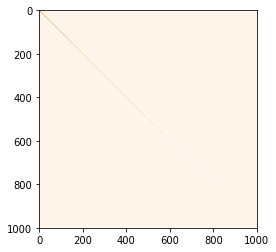

In [37]:
rank = n_features
sigman = np.zeros((rank, rank))
for i in range(rank):
    sigman[i][i] = sign[i]
fig, ax = plt.subplots()
im = ax.imshow(sigman, cmap=plt.cm.Oranges)

plt.savefig("./images/sigman_matrix.png", bbox_inches='tight');

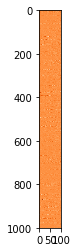

In [40]:
r = 100
fig, ax = plt.subplots()
im = ax.imshow(Un[:,:r], cmap=plt.cm.Oranges)
U_nr = Un[:,:r]

plt.savefig("./images/U_nr_matrix.png", bbox_inches='tight');

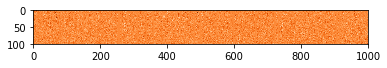

In [41]:
fig, ax = plt.subplots()
im = ax.imshow(Vn[:r,:], cmap=plt.cm.Oranges)
V_nr = Vn[:,:r]

plt.savefig("./images/V_nr_matrix.png", bbox_inches='tight');

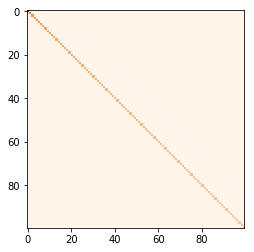

In [42]:
sigma_nr = np.zeros((r, r))
for i in range(r):
    sigma_nr[i][i] = sign[i]
fig, ax = plt.subplots()
im = ax.imshow(sigma_nr, cmap=plt.cm.Oranges)

plt.savefig("./images/sigma_nr_matrix.png", bbox_inches='tight');

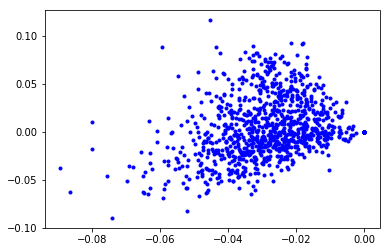

In [44]:
r = 2
V_r = Vn[:r,:]
U_r = Un[:,:r]

#in document space
plt.plot(V_r[0, :], V_r[1, :], 'b.')

plt.savefig("./images/doc_n_space.eps", bbox_inches='tight');

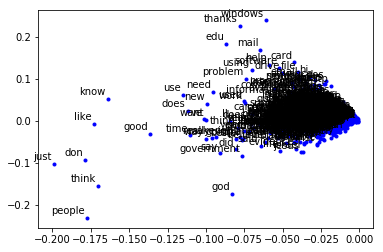

In [45]:
#in term space
plt.plot(U_r[:, 0], U_r[:, 1], 'b.')
for i in range(len(t_v1.get_feature_names())):
    label = t_v1.get_feature_names()[i]
    x = U_r[i, 0]
    y = U_r[i, 1]
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom');
plt.savefig("./images/term_n_space.eps", bbox_inches='tight');